In [110]:
#!pip install textblob

import pandas as pd
from wordcloud import WordCloud
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

##Classifiers
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from textblob import TextBlob
%matplotlib inline

# 1 Importing data

In [2]:
data = pd.read_csv('sample2_women.csv')
data.head(3)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,19036,905,34,Beautiful design and feel but...,- this really is lovely. the overall design fr...,4,1,9,General,Tops,Fine gauge
1,17393,912,75,Lovely and warm,"""does this sweater make my hips look big?"" my ...",5,1,23,General,Tops,Fine gauge
2,9458,162,46,Vegan suede leggings,"""vegan suede"" makes these sound fancier than t...",4,1,2,Initmates,Intimate,Legwear


The column **Review Text** is used to make the sentiment analysis. 

Later on the rest of the column can be used if feature engineering is needed. 

In [3]:
df = pd.DataFrame()
df['title'] = data['Title']
df['review'] = data['Review Text']
df['text'] = df['title']+' '+ df['review']
df.head(2)

,title,review,text
0,Beautiful design and feel but...,- this really is lovely. the overall design fr...,Beautiful design and feel but... - this really...
1,Lovely and warm,"""does this sweater make my hips look big?"" my ...","Lovely and warm ""does this sweater make my hip..."


# Data Understanding

In [4]:
df.shape

(23486, 3)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [5]:
# Missing values
df.isnull().sum()

title     3810
review     845
text      3811
dtype: int64

# Pre - processing text data

A couple of functions are created to clean **text** column. 


In [7]:
# Removing the missing values
df = df.dropna() 
print(df.shape)
df.isnull().sum()

(19675, 3)


title     0
review    0
text      0
dtype: int64

In [8]:
# Fucntion to remove specials characters and white spaces, and to make text lowercase
def cleaner(sentence):
    #only alpha chars (no num or spec.chars)
    sentence = re.sub('[^A-Za-z ]+', '', sentence) 
    
    #Removing whitespace
    sentence = sentence.split(' ')
    for i in sentence:
        if i == '':
            sentence.remove(i)
    sentence = ' '.join(sentence)
    
    return sentence.lower()

In [9]:
# Function to get the root of a word (process of stemming). nltk stopwords will be removed from text

port_stem = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content) # Substitude eveyry character excluding a-zA-Z
    stemmed_content = stemmed_content.lower() # make lower case 
    stemmed_content = stemmed_content.split() # split and make list
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')] # make a new list of words that are not stopwords (meaningless)
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [10]:
df['ctext'] = df['text'].apply(cleaner) 
df['ctext'] = df['ctext'].apply(stemming)
df = df.drop(columns='title')
df = df.drop(columns='review')
df = df.drop(columns='text')

,ctext
0,beauti design feel realli love overal design a...
1,love warm sweater make hip look big wife ask s...


In [17]:
ind=0
for i in df.ctext.values:
    print(str(ind)+') '+i)
    ind+=1

0) beauti design feel realli love overal design arm front back make poncho uniqu thick either make nice everyday sort thing howev didnt work even though im poncho tendenc
1) love warm sweater make hip look big wife ask sweater one christma gift fair maidenno love said look make sure reflex also correct beauti sweater dear bride mother three children make hip look bigin fact draw love line curv modest girl wear littl undershirt cleavag somewhatumsuppr
2) vegan sued leg vegan sued make sound fancier love theyr super cozi nice chang plain leg theyr microfib leg make price high even retail still im sure ill wear plenti usual wear xs fit make think theyd larg size xs
3) live pant pair sweat seem like lot money consid amount wear get pant thin littl long side flatter plu thin materi make perfect summer night love pocket big fan tie front that person prefer wont wear weekend found lot fun top jacket closet turn pant someth ill b
4) perfect weird pregnanc phase look fat look like human tap way

2430) cozi lb curvi hip small top got small fit great got wine pretti color fall winter fabric super soft cozi
2431) beauti size us could bare zip insid bra wear b think uk size kept return beauti dress lot dress mayb much someon petit look ridicul put belt
2432) could perfect lb pearshap order fit perfectli skim floor materi beauti gauzi metal materi lightweight beauti drape wonder sorbetinspir color waistband elastic elast unflatt poof happen skirt like flaw howev decis halflin skirt offwhit jersey materi halflin isnt horribl found
2433) killer dress athlet build purchas dress busi meet worri dress go low cut small chest wear lower cut without explod luckili case dress profession sexi look love nice fabric good qualiti happi bought
2434) summer blous broad shoulderscan sometim wear size depend cut purchas size true fit enough flow give room move much make look larger realli fabric us light great qualiti perfect summer night happi purchas
2435) soft pretti tall lb bought honey color f

4392) search highris jean search month find pair topqual slim fit highwaist jean either straight leg flare search end flare jean paig thank retail fabric incred soft yet littl snap stretchi come expect expens jean also like dark wash fact arent odd color striation across hip bought size fit perfectli virtual jean
4393) perfect denim jacket search perfect denim jacket love darker color modern day less run littl small alway either xs retail late cloth seem run littl bigger xs top order onlin never know size get order xs howev tight arm across shoulder want abl roll sleev return fit great
4394) slightli disappoint search high low good qualiti jean sadli dont think love design style jean great length great cut great color unfortun week ball look like ive year im disappoint continu search appar dont make jean like use
4395) perfect red dress search entir marriag year perfect christma valentin day dress red right red style sever saw year either burgundi matronli saw dress knew year search be

6138) cotton cotton love cotton love sweater tri petit store end go regular size prefer length overal fit bought blue colour shown grey purplish colour beauti fall much nicer straight blue worn work sever time alway get compliment sweater nice age soft comfort versatil might go fall sweater
6139) purrfect find love sweater other mention softest acryl world overlook simpl fact ador like crop fit pair perfectli high waist jeansskirt embroideri sort handmad feel without look cheap slit one side make uniqu opinion expect bit heavier great layer piec ideal transit colder weather may bias
6140) great sweater love sweater comfort flatter great go causal stay warm
6141) love love sweater hope order color weight sweater perfect heavi also realli like sweater lay leg bulki great sleev length
6142) subtl detail make great love sweater bought black love way back fall gentli flatter figur im curvi bottom w butt tummi like cover dont want look like im wear moomoo top look chic right shape flow gentl

7839) beauti design realli like pullov design beauti love asymmetr hem complaint fit bit boxi im largechest drapey tailor overwhelm doesnt cancel much like overal
7840) one tricki realli like romper order fit bottom im bottom top order mp cover bottom petit height keeper belt ad someth cinch waist shape
7841) cutebut realli like shirt bit matern dont mind extra fabric around stomach area lot im think make look like might hide littl secret sinc im done kid go back also somewhat see kept would worn tank top underneatha long thing dont bother realli cute
7842) long sleev your short realli like shirt overal im petit size sold bought regular short like bewar sleev almost comic long shirt stretchi cuff push sleev isnt realli option also lot loos hang thread straight packag overal keeper
7843) cute blous realli like shirt gotten plenti compliment first time ive worn
7844) great shirt realli like shirt almost didnt order base review cute comfort didnt get white color may mine see wear bra good

9684) great jean specif look nice pair highwaist jean pair fit bill littl unsur unfinish hem henc rate design would prefer finish hem tad shorter normal like wear jean coupl day still decid whether keep despit fact realli love two issu
9685) fit like bag stoke get dress truli beauti fit aw like swallow bag order usual size im lb bra size dd dress fell like sack disappoint return
9686) strang struggl option fit true size small larg small larg realli strang model make shirt look stun product actual boxi weigh lb typic order anywher prxxsx order shirt xsp shirt sleev short middl boxi quit frankli look like matern shirt structur worth money
9687) great top surpris impress well made top look feel expens good qualiti flatter fit someon like small top wider hip area look forward wear top fallwinterholiday season
9688) nice fit surpris much like sweater watch awhil went sale decid give tri couldnt decid rose black order sinc good price figur would return color didnt want boy happi order rose f

11496) classi twist love pant flatter much stretch rear waist band elast minim stretch visibl other long wearabl right heel
11497) great winter jean love pilcro jean usual size fit nice like skinni jean know gone size would look tight leg suppos leg stretch much day slightli waist enough size dark color perfect winter comfort love pilcro jean
11498) flatter comfort love sateen jean bit polish regular flat black jean shini alway wear ag jean consist usual size fit perfectli midris comfort length model hit ankl theyr easi dress feel ill get lot use
11499) super comfi short love short got pair sale hard find short fit nice comfi great length
11500) flatter attract love short tight short match mani top tt hard fit figur great weekend vacat ador
11501) great look fit love short purchas peach color color perfect fit perfect look great highli recommend
11502) fabul print love short pretti print
11503) comfi cute love short run larg wear pilcro short fit comfort bit room spare turquois definit

13302) ador dress soft comfi flatter beauti dress work occas cant express much love
13303) live soft comfi great fit perfect cozi item fall winter look realli cute sleev roll cuf slightli fabric patchwork linen terryjersey materi im usual medium medium fit great slim line great job swingyflar without tent look
13304) pill problem soft cozi cute pill badli st wear releg wear home onlyfor reason cannot recommend felt like wast moneyi purchas xs petit im lb could gone xx ok looser
13305) soft lighter weight look soft cozi heather offwhitepalest gray great coolton neutral surpris lightweight nearli warm look hood fuzzi sherpa line unlin jacket soft fleec flannel finish insid zigzag seam ousid look like sweatshirt work great top layer though polyest cotton rayongot size fit hip work great im current ish wi
13306) love soft eleg beauti make feel special could one ask fit true size variou style option best retail purchas time
13307) great jacket soft lightweight comfort wore soon got receiv m

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(-0.5, 999.5, 499.5, -0.5)

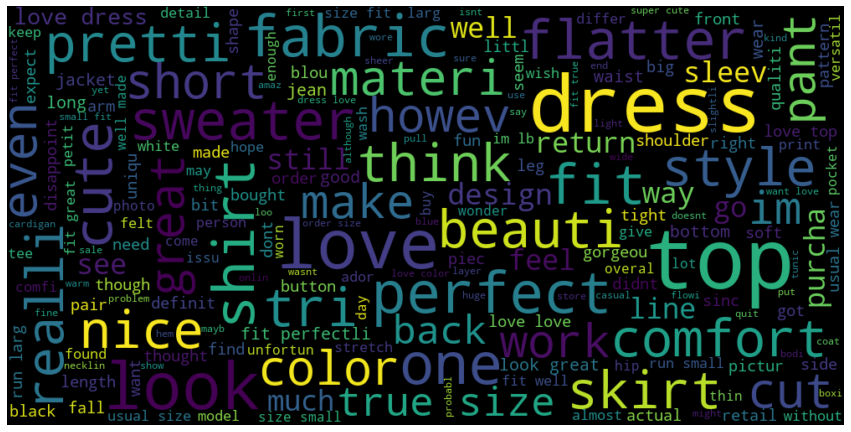

In [42]:
# Wordcloud
words = ' '.join( [review for review in df['ctext']])
wordc = WordCloud(width=1000, height=500, random_state=21, max_font_size=100).generate(words)

figure = plt.figure(figsize=(15,10))
plt.imshow(wordc, interpolation='bilinear')
plt.axis('off')

# Apply lexicon methods to predict sentiments

## TextBlob

TextBlob is a python library for processing text data. It has an API for common NLPs processing tasks including sentiment analysis. 

In [20]:
# Function to get the polarity property
def polarity(text):
    return TextBlob(text).sentiment.polarity

# Function to get the subjectivity property 
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [21]:
tb = df.copy()
tb['Subjectivity'] = df['ctext'].apply(subjectivity)
tb['Polarity'] = df['ctext'].apply(polarity)
tb.head()

,ctext,Subjectivity,Polarity
0,beauti design feel realli love overal design a...,0.535000,0.120000
1,love warm sweater make hip look big wife ask s...,0.648611,0.425000
2,vegan sued leg vegan sued make sound fancier l...,0.610270,0.192905
5,live pant pair sweat seem like lot money consi...,0.600000,0.108636
6,perfect weird pregnanc phase look fat look lik...,0.693889,0.331667


In [79]:
# Classifying polarity
def sentiment(num):
    if num<0:
        return 'Negative'
    elif num == 0:
        return 'Neutral'
    else:
        return 'Positive'

tb['Sentiment'] = tb['Polarity'].apply(sentiment)

tb.head(3)

,ctext,Subjectivity,Polarity,Sentiment
0,beauti design feel realli love overal design a...,0.535000,0.120000,Positive
1,love warm sweater make hip look big wife ask s...,0.648611,0.425000,Positive
2,vegan sued leg vegan sued make sound fancier l...,0.610270,0.192905,Positive


In [98]:
tb.Sentiment.value_counts()

Positive    18273
Negative     1105
Neutral       297
Name: Sentiment, dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

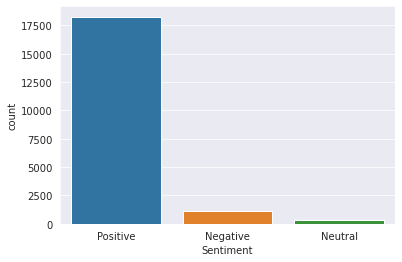

In [93]:
sns.countplot(x='Sentiment', data=tb)

# Vader

In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

In [33]:
test = 'Thats not a good day yes'
s = SentimentIntensityAnalyzer()
s.polarity_scores(test)

{'neg': 0.609, 'neu': 0.391, 'pos': 0.0, 'compound': -0.5667}

In [82]:
def vPolarity(text):
    return SentimentIntensityAnalyzer().polarity_scores(text)

In [69]:
vd = df.copy()
vd['polarity'] = df['ctext'].apply(vPolarity)
vd.head(5)

,ctext,polarity
0,beauti design feel realli love overal design a...,"{'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'comp..."
1,love warm sweater make hip look big wife ask s...,"{'neg': 0.0, 'neu': 0.607, 'pos': 0.393, 'comp..."
2,vegan sued leg vegan sued make sound fancier l...,"{'neg': 0.053, 'neu': 0.648, 'pos': 0.299, 'co..."
5,live pant pair sweat seem like lot money consi...,"{'neg': 0.046, 'neu': 0.639, 'pos': 0.315, 'co..."
6,perfect weird pregnanc phase look fat look lik...,"{'neg': 0.058, 'neu': 0.693, 'pos': 0.249, 'co..."


In [65]:
vd.polarity.values[1]

{'neg': 0.0, 'neu': 0.607, 'pos': 0.393, 'compound': 0.9738}

In [64]:
items = vd.polarity.values
sentLs = []
for i in items:
    for j in i:
        if j=='compound':
            sentLs.append(i[j])
        
sentLs    

[0.7906,
 0.9738,
 0.9169,
 0.9371,
 0.903,
 0.9182,
 0.8176,
 0.9576,
 0.886,
 0.8126,
 0.5279,
 0.9517,
 0.7965,
 0.7351,
 0.4588,
 0.9042,
 0.9231,
 0.9509,
 0.9325,
 0.2033,
 0.7506,
 0.9432,
 0.872,
 -0.1027,
 0.4242,
 0.6486,
 0.7184,
 0.7717,
 0.888,
 0.3612,
 0.4939,
 0.9349,
 0.2425,
 0.6896,
 0.8481,
 0.5676,
 0.8126,
 0.8176,
 0.9524,
 0.8176,
 0.2732,
 0.9427,
 0.9062,
 0.8176,
 0.6908,
 0.8625,
 0.93,
 0.9687,
 0.9719,
 0.8481,
 0.9682,
 0.0,
 0.7184,
 0.9493,
 0.946,
 0.5423,
 0.7602,
 0.9201,
 0.8442,
 0.9774,
 0.886,
 0.7506,
 0.8911,
 0.7845,
 0.7096,
 0.1779,
 0.8755,
 0.6369,
 0.9432,
 0.9081,
 0.836,
 0.5994,
 0.1027,
 0.6249,
 0.9371,
 0.9062,
 0.0946,
 0.872,
 0.8481,
 -0.1531,
 0.9723,
 0.8689,
 -0.3818,
 0.8442,
 0.9712,
 0.9246,
 0.91,
 0.836,
 0.9595,
 0.0772,
 0.8312,
 0.9595,
 0.936,
 0.8779,
 0.8591,
 0.93,
 0.91,
 0.9186,
 0.9859,
 0.9423,
 0.8934,
 0.4588,
 0.7964,
 0.7351,
 -0.3612,
 0.9538,
 0.9595,
 0.9571,
 0.9169,
 0.9081,
 0.4404,
 0.9442,
 0.8834,


In [81]:
vd['compound'] = sentLs
vd['sentiment'] = vd['compound'].apply(sentiment)
vd.head(5)

,ctext,polarity,compound,sentiment
0,beauti design feel realli love overal design a...,"{'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'comp...",0.7906,Positive
1,love warm sweater make hip look big wife ask s...,"{'neg': 0.0, 'neu': 0.607, 'pos': 0.393, 'comp...",0.9738,Positive
2,vegan sued leg vegan sued make sound fancier l...,"{'neg': 0.053, 'neu': 0.648, 'pos': 0.299, 'co...",0.9169,Positive
5,live pant pair sweat seem like lot money consi...,"{'neg': 0.046, 'neu': 0.639, 'pos': 0.315, 'co...",0.9371,Positive
6,perfect weird pregnanc phase look fat look lik...,"{'neg': 0.058, 'neu': 0.693, 'pos': 0.249, 'co...",0.9030,Positive


In [97]:
vd.sentiment.value_counts()

Positive    18681
Negative      786
Neutral       208
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

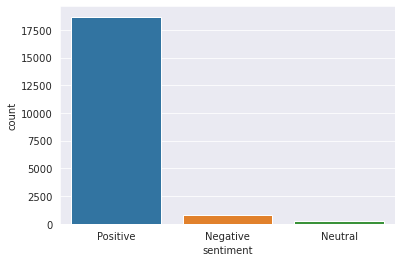

In [94]:
sns.countplot(x='sentiment', data=vd)

There are small differences in the TextBlob and Vader:

-   --TextBlob--
- Positive    18273
- Negative     1105
- Neutral       297

-    --Vader--
- Positive    18681
- Negative      786
- Neutral       208

# Modeling - ML

In [ ]:
# Vectorizier
vectorizer = TfidfVectorizer()

## Vader

In [107]:
# Vader
vdfeatures = vd['ctext'].values
vdlabel = vd['sentiment'].values

# Vectorizing
vectorizer.fit(vdfeatures)
vdfeatures = vectorizer.transform(vdfeatures)

# train and test split
x_train, x_test, y_train, y_test = train_test_split(vdfeatures, vdlabel, test_size = 0.2, stratify = vdlabel, random_state = 2)

In [108]:
#Creating function for evaluation (accuracy and cross validation)
def alg_scr(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [109]:
# GBC
pred, accuracy_gbc, accuracy_crvl_gbc = alg_scr(GradientBoostingClassifier(), x_train, y_train, 10)

# LogReg
pred, accuracy_LgR, accuracy_crvl_LgR = alg_scr(LogisticRegression(), x_train, y_train, 10)

# DT
pred, accuracy_dt, accuracy_crvl_dt = alg_scr(DecisionTreeClassifier(), x_train, y_train, 10)

# KNN
pred, accuracy_knn, accuracy_crvl_knn = alg_scr(KNeighborsClassifier(), x_train, y_train, 10)

# SDG
pred, accuracy_sdg, accuracy_crvl_sdg = alg_scr(SGDClassifier(), x_train, y_train, 310)

/home/ds/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 166 members, which is less than n_splits=310.
  warnings.warn(("The least populated class in y has only %d"


In [111]:
# Creating a table presenting the cross val and accuracy of models
table = pd.DataFrame({
    'Model': ['KNeighborsClassifier', 'GradientBoostingClassifier', 'LogisticRegression', 
              'DecisionTreeClassifier', 'SDGClassifier'],
    
    'Accuracy %': [accuracy_knn, accuracy_gbc, accuracy_LgR, accuracy_dt, accuracy_sdg],
    
    
    'CV Accuracy %': [accuracy_crvl_knn, accuracy_crvl_gbc, 
                      accuracy_crvl_LgR, accuracy_crvl_dt,accuracy_crvl_sdg]})

table.sort_values(by = 'CV Accuracy %', ascending=False)

,Model,Accuracy %,CV Accuracy %
2,LogisticRegression,95.72,95.25
1,GradientBoostingClassifier,96.02,95.10
4,SDGClassifier,95.22,95.02
0,KNeighborsClassifier,95.25,94.78
3,DecisionTreeClassifier,100.00,93.58


## TextBlob

In [114]:
# TextBlob
tbfeatures = tb['ctext'].values
tblabel = tb['Sentiment'].values

# Vectorizing
vectorizer.fit(tbfeatures)
vdfeatures = vectorizer.transform(tbfeatures)

# train and test split
x_train, x_test, y_train, y_test = train_test_split(vdfeatures, tblabel, test_size = 0.2, stratify = vdlabel, random_state = 2)

In [115]:
# GBC
pred, accuracy_gbc, accuracy_crvl_gbc = alg_scr(GradientBoostingClassifier(), x_train, y_train, 10)

# LogReg
pred, accuracy_LgR, accuracy_crvl_LgR = alg_scr(LogisticRegression(), x_train, y_train, 10)

# DT
pred, accuracy_dt, accuracy_crvl_dt = alg_scr(DecisionTreeClassifier(), x_train, y_train, 10)

# KNN
pred, accuracy_knn, accuracy_crvl_knn = alg_scr(KNeighborsClassifier(), x_train, y_train, 10)

# SDG
pred, accuracy_sdg, accuracy_crvl_sdg = alg_scr(SGDClassifier(), x_train, y_train, 310)

/home/ds/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 238 members, which is less than n_splits=310.
  warnings.warn(("The least populated class in y has only %d"


In [116]:
# Creating a table presenting the cross val and accuracy of models
table = pd.DataFrame({
    'Model': ['KNeighborsClassifier', 'GradientBoostingClassifier', 'LogisticRegression', 
              'DecisionTreeClassifier', 'SDGClassifier'],
    
    'Accuracy %': [accuracy_knn, accuracy_gbc, accuracy_LgR, accuracy_dt, accuracy_sdg],
    
    
    'CV Accuracy %': [accuracy_crvl_knn, accuracy_crvl_gbc, 
                      accuracy_crvl_LgR, accuracy_crvl_dt,accuracy_crvl_sdg]})

table.sort_values(by = 'CV Accuracy %', ascending=False)

,Model,Accuracy %,CV Accuracy %
2,LogisticRegression,95.22,94.09
1,GradientBoostingClassifier,95.05,93.87
4,SDGClassifier,95.06,93.84
3,DecisionTreeClassifier,100.00,92.71
0,KNeighborsClassifier,93.67,92.58


# Evaluation

THe feature created with Vader classifier seems to work with slightly higher accuracy compared to TextBlob

**TextBlob**
- 	LogisticRegression 	        94.09
- 	GradientBoostingClassifier 	93.87
- 	SDGClassifier 	            93.84
- 	DecisionTreeClassifier 	    92.71
- 	KNeighborsClassifier 	    93.67 	

**Vader**

- 	LogisticRegression 	95.25
- 	GradientBoostingClassifier 	95.10
- 	SDGClassifier 	95.02
- 	KNeighborsClassifier 	94.78
- 	DecisionTreeClassifier 	93.58
